In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\btam\Documents\Python_Folder\DAT-06-24\class material\Unit 2\data\titanic.csv')

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
#adding column to data frame
df['Family Size'] = df.SibSp + df.Parch
#or
#df.family_size = df['SibSp'] +df['Parch']
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [5]:
#Using where to add statement. where(t/f statement, True return, False return)
df['Young or old'] = np.where(df['Age'] >35, 'Old AF','Young Noob')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Young or old
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Young Noob
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Old AF
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Young Noob


In [6]:
#using select which can use columns based on predetermined attributes
conditions = [
    (df['Sex'] == 'male') & (df['Age'] >= 35),
    (df['Sex'] == 'male') & (df['Age'] < 35),
    (df['Sex'] == 'female') & (df['Age'] >= 35),
    (df['Sex'] == 'female') & (df['Age'] < 35),
]
results = [
    'Old Dude',
    'Young Bro',
    'Old Chick',
    'Young Girl'
]

df['Age_Status'] = np.select(conditions, results, 'Other')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Young or old,Age_Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Young Noob,Young Bro
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Old AF,Old Chick
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Young Noob,Young Girl


In [7]:
new_vals = {
    'S':1,
    'C':2,
    'Q':3
}

df['Embarked'] = df['Embarked'].map(new_vals)

In [8]:
df['Embarked'].value_counts()

1.0    644
2.0    168
3.0     77
Name: Embarked, dtype: int64

In [9]:
#categoriziation using cut
df['ticket_type'] = pd.cut(df['Fare'], bins=[0,15,65,513], labels=['economy','business','vip'])
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Young or old,Age_Status,ticket_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1,Young Noob,Young Bro,economy
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2.0,1,Old AF,Old Chick,vip
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0,Young Noob,Young Girl,economy


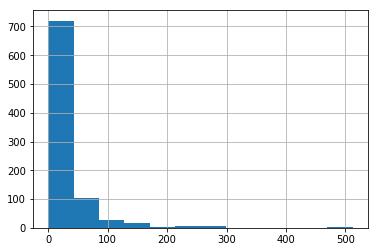

In [10]:
df['Fare'].hist(bins=12)

In [11]:
#%time it 
#Times it lol

In [14]:
def whatever(age):
    if age%2 ==0:
        return 'Even'
    else:
        return 'Odd'
    
df['Even or Odd'] = df['Age'].apply(whatever)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Young or old,Age_Status,ticket_type,Even or Odd
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1,Young Noob,Young Bro,economy,Even
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2.0,1,Old AF,Old Chick,vip,Even
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0,Young Noob,Young Girl,economy,Even
